## int8 Quantization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random values in range [-1.0, 1.0]
x = np.linspace(-1.0, 1.0, 100)
x[:10]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182])

In [2]:
# Define quantization parameters
min_x = -1.0
max_x = 1.0
qmin = -128
qmax = 127

# Calculate scale and zero point for symmetric quantization
scale = (max_x - min_x)/(qmax - qmin)
scale

0.00784313725490196

In [3]:
# Hyperparameter
zero_point = 0 # Symmetric quantization

# Quantizatio: float -> int8
q = np.round((x - zero_point)/scale).astype(int)

# Clip to valid range -> [-128, 127]
q = np.clip(q,qmin,qmax)
q[:10]

array([-128, -125, -122, -120, -117, -115, -112, -109, -107, -104])

In [5]:
for i in range(10):
    print(x[i], ' Mapped to -> ', q[i])

-1.0  Mapped to ->  -128
-0.9797979797979798  Mapped to ->  -125
-0.9595959595959596  Mapped to ->  -122
-0.9393939393939394  Mapped to ->  -120
-0.9191919191919192  Mapped to ->  -117
-0.898989898989899  Mapped to ->  -115
-0.8787878787878788  Mapped to ->  -112
-0.8585858585858586  Mapped to ->  -109
-0.8383838383838383  Mapped to ->  -107
-0.8181818181818181  Mapped to ->  -104


In [6]:
# Dequantization: int8 -> float
x_hat = scale * (q - zero_point)
x_hat[:10]

array([-1.00392157, -0.98039216, -0.95686275, -0.94117647, -0.91764706,
       -0.90196078, -0.87843137, -0.85490196, -0.83921569, -0.81568627])

- There is some loss in while Dequantization, because for the quantization.

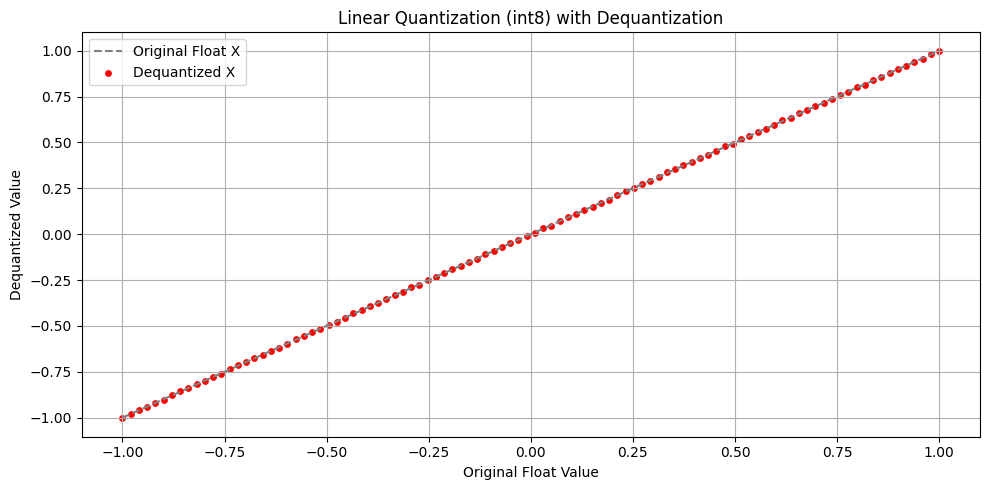

In [7]:
# Plot original vs. dequantized

plt.figure(figsize=(10,5))
plt.plot(x, x, label='Original Float X', linestyle='--', color='grey')
plt.scatter(x, x_hat, label='Dequantized X', color='red', s=15)
plt.title('Linear Quantization (int8) with Dequantization')
plt.xlabel('Original Float Value')
plt.ylabel('Dequantized Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## NF4 (Normal Float 4) Quantization

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Define 16 NF4 representative float values
# These are example NF4 values (manually chosen to mimic a Gaussian distribution)
# In practice, Libraries like bitsandbytes use optimized values

nf4_values = np.array([
    -1.0, -0.75, -0.5, -0.35, -0.2, -0.1, -0.05, -0.01,
    0.01, 0.05, 0.1, 0.2, 0.35, 0.5, 0.75, 1.0
])

# Step 2: Generate some random values in range [-1.0, 1.0]
x = np.linspace(-1.0, 1.0, 100)
x[:10]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182])

In [21]:
# Experimentaiton with quantize_to_nf4

tx = np.array([1, 2, 3, 4, 5])
ty = np.array([9, 8, 7, 1, 3])

many_to_many = np.abs(tx[:, None] - ty[None, :])
print("Many to many :\n",many_to_many)

final = np.argmin(many_to_many, axis=1)

print("Final index : ",final)

Many to many :
 [[8 7 6 0 2]
 [7 6 5 1 1]
 [6 5 4 2 0]
 [5 4 3 3 1]
 [4 3 2 4 2]]
Final index :  [3 3 4 4 2]


In [9]:
# Step 3: Quantize x by mapping to nearest NF4 values
def quantize_to_nf4(x_vals, nf4_lut):
    indices = np.argmin(np.abs(x_vals[:, None] - nf4_lut[None, :]), axis=1)
    return nf4_lut[indices]

x_nf4 = quantize_to_nf4(x, nf4_values)
x_nf4[:10]

array([-1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -0.75, -0.75,
       -0.75])

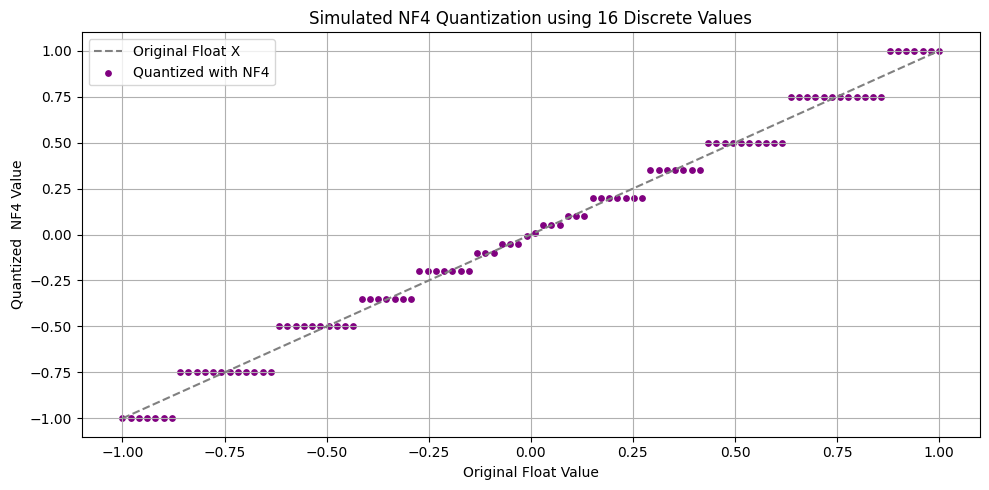

In [10]:
# Step 4: Plot original vs. quantised (NF4)

plt.figure(figsize=(10,5))
plt.plot(x, x, label='Original Float X', linestyle='--', color='grey')
plt.scatter(x, x_nf4, label='Quantized with NF4', color='purple', s=15)
plt.title('Simulated NF4 Quantization using 16 Discrete Values')
plt.xlabel('Original Float Value')
plt.ylabel('Quantized  NF4 Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()